<a href="https://colab.research.google.com/github/manasmaskar/brainTumor/blob/v3/brain2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import torch

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.0.0+cu118 (Tesla T4)


In [3]:
! git clone https://github.com/WongKinYiu/yolov7
! cd yolov7
! pip install -r ./yolov7/requirements.txt
! wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt
! cd ../

Cloning into 'yolov7'...
remote: Enumerating objects: 1157, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 1157 (delta 10), reused 14 (delta 7), pack-reused 1139
Receiving objects: 100% (1157/1157), 70.41 MiB | 31.88 MiB/s, done.
Resolving deltas: 100% (498/498), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.6/1.6 MB 24.2 MB/s eta 0:00:00
--2023-05-15 12:29:44--  https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/github-production-release-asset-2e65be/511187726/b0243edf-9fb0-4337-95e1-42555f1b37cf?X-Amz

In [4]:
os.mkdir('./yolov7/dataset')
os.mkdir('./yolov7/dataset/train')
os.mkdir('./yolov7/dataset/train/images')
os.mkdir('./yolov7/dataset/train/labels')
os.mkdir('./yolov7/dataset/test')
os.mkdir('./yolov7/dataset/test/images')
os.mkdir('./yolov7/dataset/test/labels')

In [5]:
dataset_path = '/content/drive/MyDrive/brain2/axial_t1wce_2_class'

In [6]:
train_path = "./yolov7/dataset/train"
test_path = "./yolov7/dataset/test"

In [7]:
! cp '/content/drive/MyDrive/brain2/axial_t1wce_2_class/images/train/'*'/content/yolov7/dataset/train/images/'
! cp '/content/drive/MyDrive/brain2/axial_t1wce_2_class/labels/train/'*'/content/yolov7/dataset/train/labels/'
! cp '/content/drive/MyDrive/brain2/axial_t1wce_2_class/images/test/'*'/content/yolov7/dataset/test/images/'
! cp '/content/drive/MyDrive/brain2/axial_t1wce_2_class/labels/test/'*'/content/yolov7/dataset/test/labels/'

cp: missing destination file operand after '/content/drive/MyDrive/brain2/axial_t1wce_2_class/images/train/*/content/yolov7/dataset/train/images/'
Try 'cp --help' for more information.
cp: missing destination file operand after '/content/drive/MyDrive/brain2/axial_t1wce_2_class/labels/train/*/content/yolov7/dataset/train/labels/'
Try 'cp --help' for more information.
cp: missing destination file operand after '/content/drive/MyDrive/brain2/axial_t1wce_2_class/images/test/*/content/yolov7/dataset/test/images/'
Try 'cp --help' for more information.
cp: missing destination file operand after '/content/drive/MyDrive/brain2/axial_t1wce_2_class/labels/test/*/content/yolov7/dataset/test/labels/'
Try 'cp --help' for more information.


In [8]:
! cp '/content/drive/MyDrive/brain2/axial_t1wce_2_class/images/train/'* '/content/yolov7/dataset/train/images/'
# ! cp {dataset_path}/labels/train/* {train_path}/labels/
# ! cp {dataset_path}/images/test/* {test_path}/images/
# ! cp {dataset_path}/labels/test/* {test_path}/labels/

In [9]:
! cp '/content/drive/MyDrive/brain2/axial_t1wce_2_class/images/test/'* '/content/yolov7/dataset/test/images/'
! cp '/content/drive/MyDrive/brain2/axial_t1wce_2_class/labels/train/'* '/content/yolov7/dataset/train/labels/'
! cp '/content/drive/MyDrive/brain2/axial_t1wce_2_class/labels/test/'* '/content/yolov7/dataset/test/labels/'

In [10]:
train_images = os.listdir('/content/yolov7/dataset/train/images')
test_images = os.listdir('/content/yolov7/dataset/test/images')

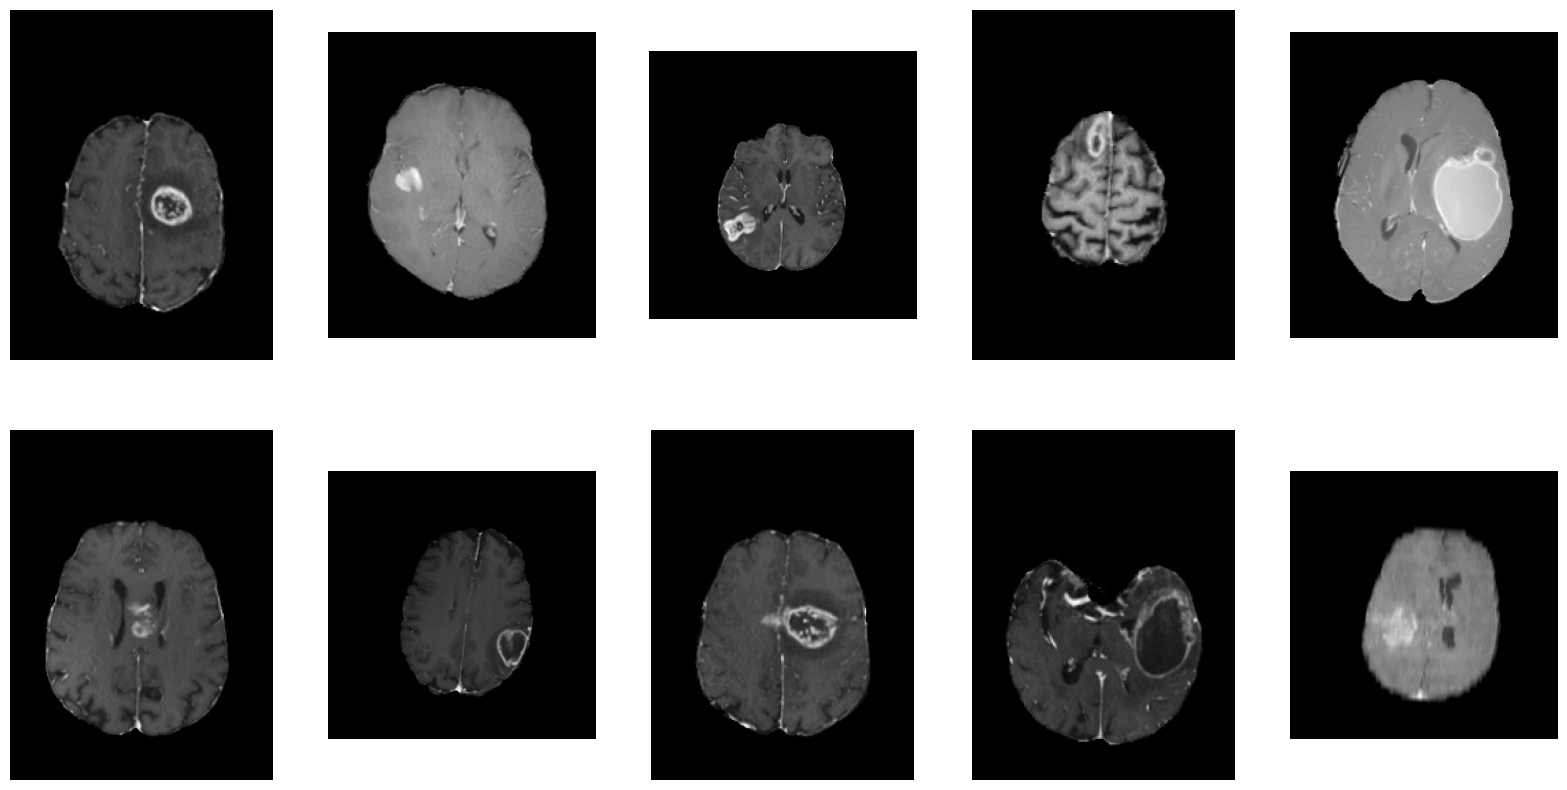

In [11]:
plt.figure(figsize=(20,10))
for i, c in enumerate(np.random.randint(0, len(train_images), size=10), start=1):
    plt.subplot(2,5,i)
    im = plt.imread('/content/yolov7/dataset/train'+'/images/'+train_images[c])
    plt.axis('off')
    plt.imshow(im, cmap='gray')

In [12]:
#editing the coco yaml 

text = """
train: ./yolov7/dataset/train
val: ./yolov7/dataset/test

# number of classes
nc: 2

# class names
names: ['negative','positive']
"""
with open("./yolov7/data/coco.yaml", 'w') as file:
    file.write(text)

In [13]:
text = """
# parameters
nc: 2  # number of classes
depth_multiple: 1.0  # model depth multiple
width_multiple: 1.0  # layer channel multiple

# anchors
anchors:
  - [12,16, 19,36, 40,28]  # P3/8
  - [36,75, 76,55, 72,146]  # P4/16
  - [142,110, 192,243, 459,401]  # P5/32

# yolov7 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [32, 3, 1]],  # 0
  
   [-1, 1, Conv, [64, 3, 2]],  # 1-P1/2      
   [-1, 1, Conv, [64, 3, 1]],
   
   [-1, 1, Conv, [128, 3, 2]],  # 3-P2/4  
   [-1, 1, Conv, [64, 1, 1]],
   [-2, 1, Conv, [64, 1, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [256, 1, 1]],  # 11
         
   [-1, 1, MP, []],
   [-1, 1, Conv, [128, 1, 1]],
   [-3, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [128, 3, 2]],
   [[-1, -3], 1, Concat, [1]],  # 16-P3/8  
   [-1, 1, Conv, [128, 1, 1]],
   [-2, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [512, 1, 1]],  # 24
         
   [-1, 1, MP, []],
   [-1, 1, Conv, [256, 1, 1]],
   [-3, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [256, 3, 2]],
   [[-1, -3], 1, Concat, [1]],  # 29-P4/16  
   [-1, 1, Conv, [256, 1, 1]],
   [-2, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [1024, 1, 1]],  # 37
         
   [-1, 1, MP, []],
   [-1, 1, Conv, [512, 1, 1]],
   [-3, 1, Conv, [512, 1, 1]],
   [-1, 1, Conv, [512, 3, 2]],
   [[-1, -3], 1, Concat, [1]],  # 42-P5/32  
   [-1, 1, Conv, [256, 1, 1]],
   [-2, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [1024, 1, 1]],  # 50
  ]

# yolov7 head
head:
  [[-1, 1, SPPCSPC, [512]], # 51
  
   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [37, 1, Conv, [256, 1, 1]], # route backbone P4
   [[-1, -2], 1, Concat, [1]],
   
   [-1, 1, Conv, [256, 1, 1]],
   [-2, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [256, 1, 1]], # 63
   
   [-1, 1, Conv, [128, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [24, 1, Conv, [128, 1, 1]], # route backbone P3
   [[-1, -2], 1, Concat, [1]],
   
   [-1, 1, Conv, [128, 1, 1]],
   [-2, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [128, 1, 1]], # 75
      
   [-1, 1, MP, []],
   [-1, 1, Conv, [128, 1, 1]],
   [-3, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [128, 3, 2]],
   [[-1, -3, 63], 1, Concat, [1]],
   
   [-1, 1, Conv, [256, 1, 1]],
   [-2, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [256, 1, 1]], # 88
      
   [-1, 1, MP, []],
   [-1, 1, Conv, [256, 1, 1]],
   [-3, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [256, 3, 2]],
   [[-1, -3, 51], 1, Concat, [1]],
   
   [-1, 1, Conv, [512, 1, 1]],
   [-2, 1, Conv, [512, 1, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [512, 1, 1]], # 101
   
   [75, 1, RepConv, [256, 3, 1]],
   [88, 1, RepConv, [512, 3, 1]],
   [101, 1, RepConv, [1024, 3, 1]],

   [[102,103,104], 1, IDetect, [nc, anchors]],   # Detect(P3, P4, P5)
  ]
"""

with open("./yolov7/cfg/training/yolov7.yaml", 'w') as file:
    file.write(text)

In [14]:
pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.0/2.0 MB 30.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 203.3/203.3 kB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 184.3/184.3 kB 20.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 62.7/62.7 kB 9.5 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=b3d3e4e59fe8608697966db78cb07886b5562c8b5cbb95a56b2ad44190b05ef7
  Stored in directory: /root/.cache/pip/wheels/b7/0a/67/ada2a22079218c75

In [15]:
!wandb disabled


W&B disabled.


In [17]:
os.mkdir('/content/drive/MyDrive/brain2/yoloV7_rs/')

In [18]:
os.mkdir('/content/drive/MyDrive/brain2/yoloV7_rs/r1')

In [19]:
! python ./yolov7/train.py --weights yolov7.pt --cfg ./yolov7/cfg/training/yolov7.yaml --data ./yolov7/data/coco.yaml --batch-size 16 --epochs 100 --img-size 640 640 --hyp ./yolov7/data/hyp.scratch.custom.yaml --name '/content/drive/MyDrive/brain2/yoloV7_rs/r1'

2023-05-15 12:37:08.369718: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-15 12:37:09.265327: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
YOLOR üöÄ v0.1-122-g3b41c2c torch 2.0.0+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Namespace(weights='yolov7.pt', cfg='./yolov7/cfg/training/yolov7.yaml', data='./yolov7/data/coco.yaml', hyp='./yolov7/data/hyp.scratch.custom.yaml', epochs=100, batch_size=16, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=8, project='runs/train', entity=None, name='/cont

In [21]:
! ls /content/drive/MyDrive/brain2/yoloV7_rs/r12


confusion_matrix.png				    test_batch2_labels.jpg
events.out.tfevents.1684154233.c1f8fd804fca.3780.0  test_batch2_pred.jpg
F1_curve.png					    train_batch0.jpg
hyp.yaml					    train_batch1.jpg
opt.yaml					    train_batch2.jpg
P_curve.png					    train_batch3.jpg
PR_curve.png					    train_batch4.jpg
R_curve.png					    train_batch5.jpg
results.png					    train_batch6.jpg
results.txt					    train_batch7.jpg
test_batch0_labels.jpg				    train_batch8.jpg
test_batch0_pred.jpg				    train_batch9.jpg
test_batch1_labels.jpg				    weights
test_batch1_pred.jpg


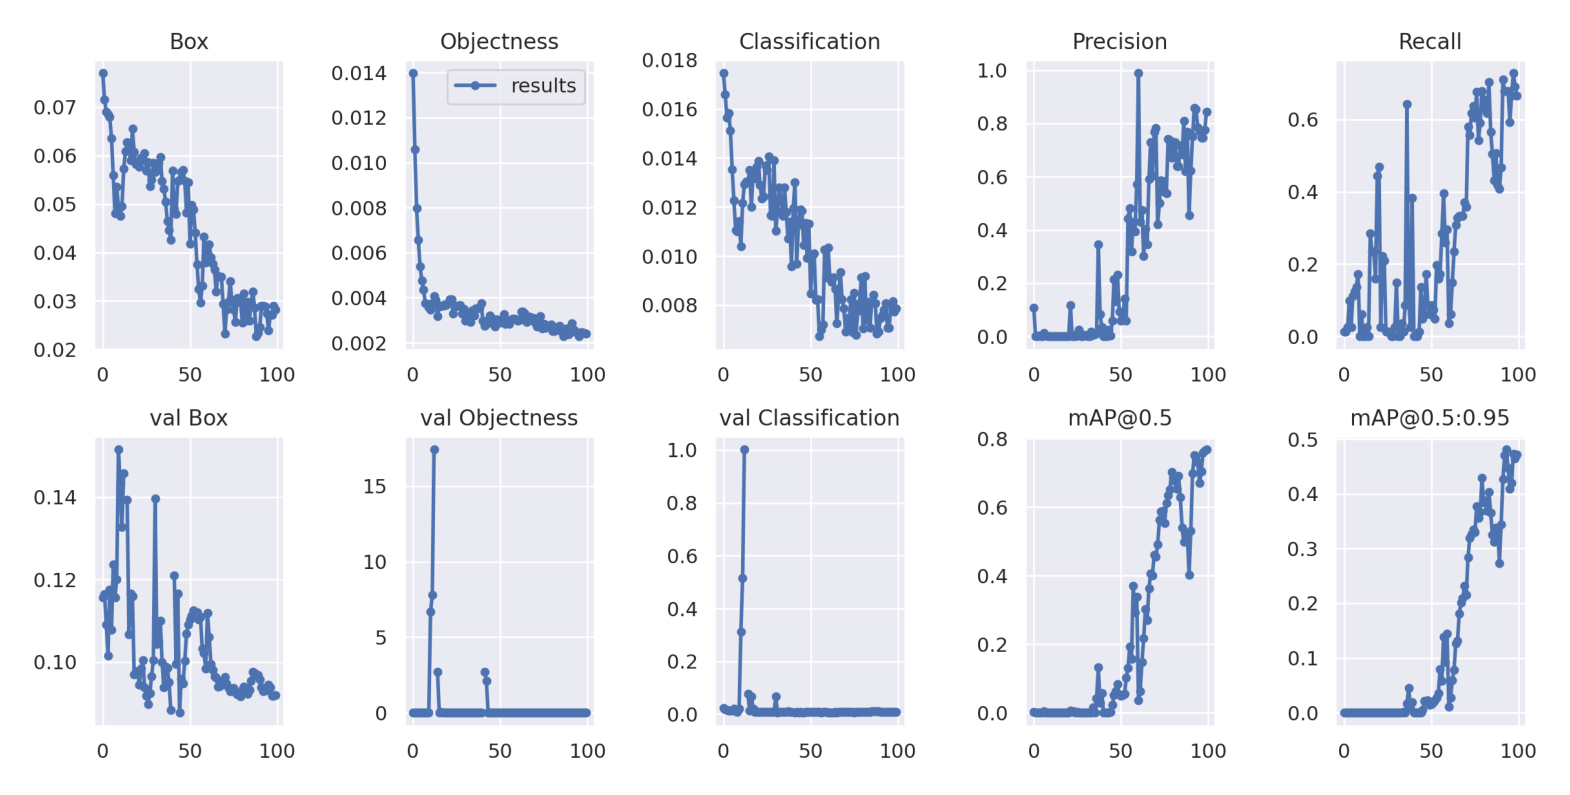

In [ ]:
img = plt.imread('./runs/train/run/results.png')
plt.figure(figsize=(20,15))
plt.imshow(img)
plt.axis('off')
plt.show()

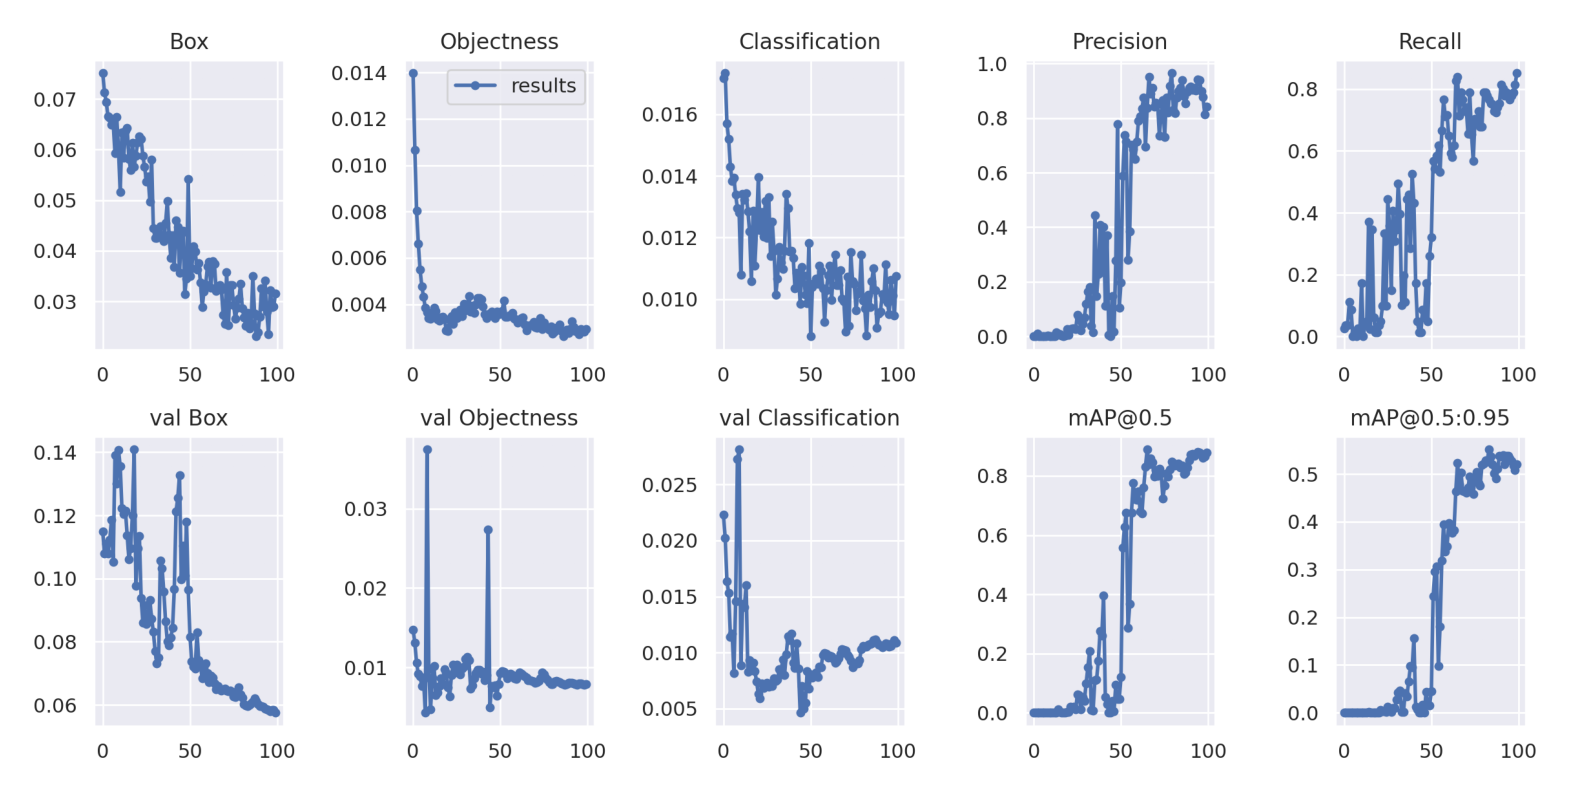

In [ ]:
img = plt.imread('./runs/train/run2/results.png')
plt.figure(figsize=(20,15))
plt.imshow(img)
plt.axis('off')
plt.show()

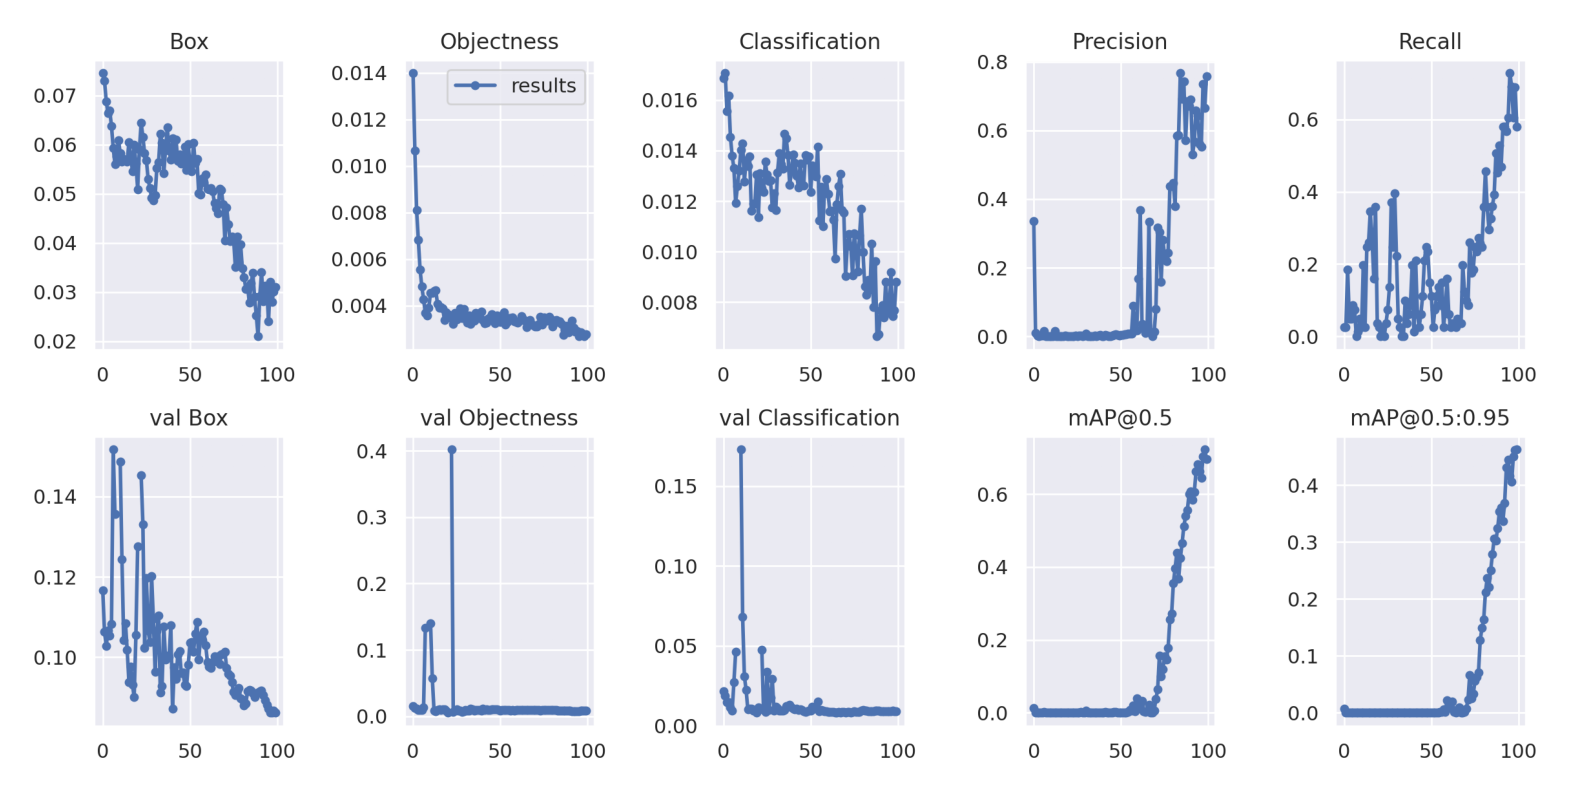

In [22]:


img = plt.imread('/content/drive/MyDrive/brain2/yoloV7_rs/r12/results.png')
plt.figure(figsize=(20,15))
plt.imshow(img)
plt.axis('off')
plt.show()

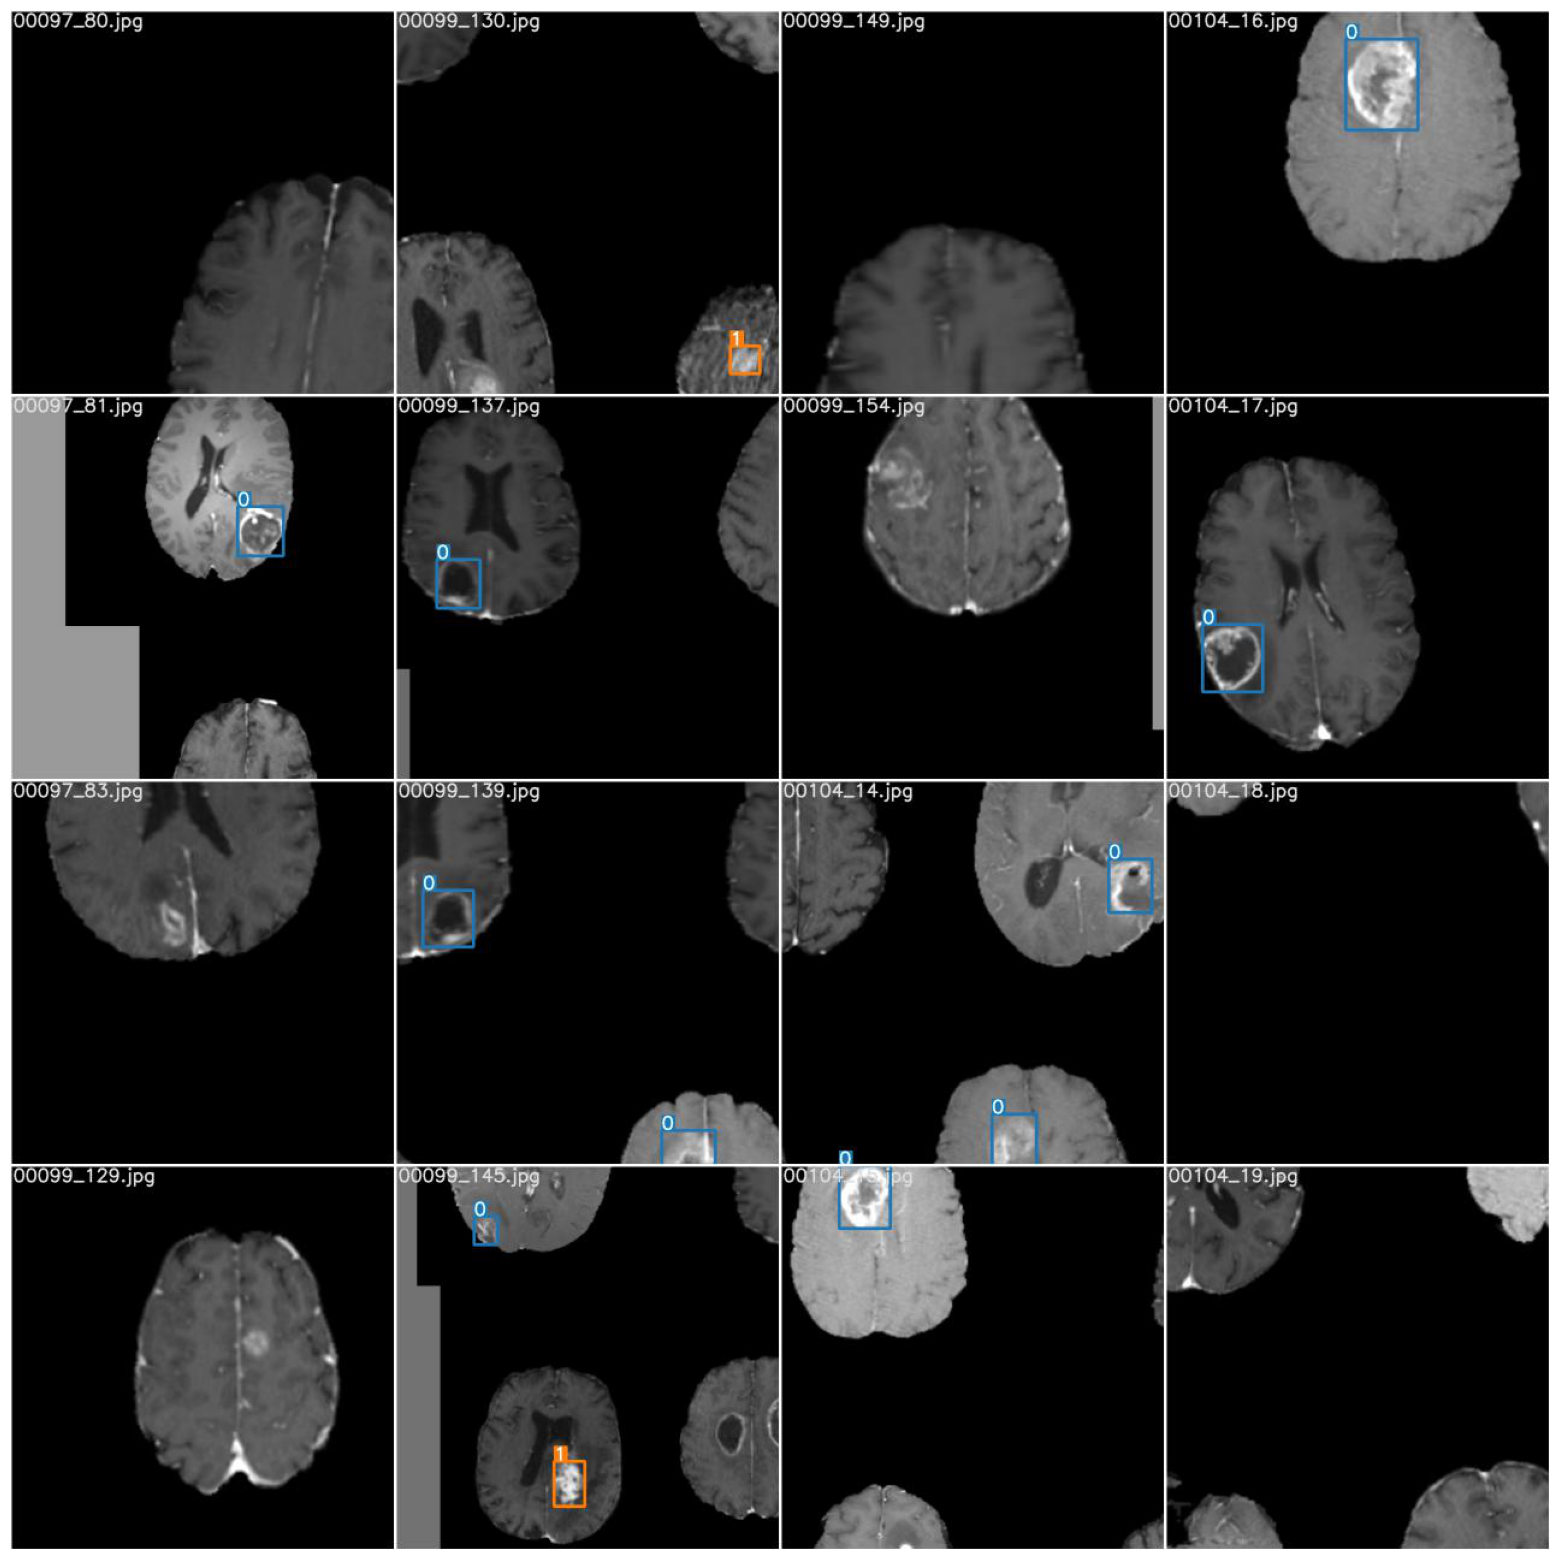

In [23]:
#large dataset batch 1 images

img = plt.imread('/content/drive/MyDrive/brain2/yoloV7_rs/r12/train_batch1.jpg')
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
img = random.choice(test_images)
! python ./yolov7/detect.py  --weights ./runs/train/run2/weights/best.pt --conf 0.5 --img-size 640 --source '/content/yolov7/dataset/test/images/{img}' --no-trace

Namespace(weights=['./runs/train/run2/weights/best.pt'], source='/content/yolov7/dataset/test/images/00088_145.jpg', img_size=640, conf_thres=0.5, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=True)
YOLOR üöÄ v0.1-122-g3b41c2c torch 2.0.0+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36487166 parameters, 6194944 gradients, 103.2 GFLOPS
Done. (21.9ms) Inference, (44.4ms) NMS
 The image wit

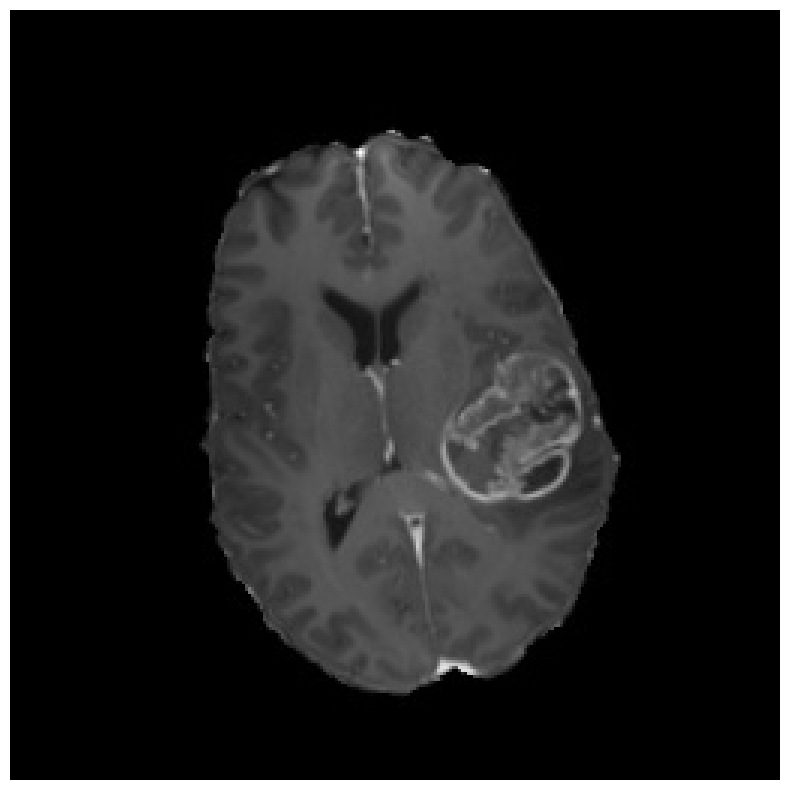

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
im = plt.imread('/content/runs/detect/exp/00072_73.jpg')
plt.axis('off')
plt.imshow(im)

In [25]:
! cp '/content/drive/MyDrive/brain2/yoloV7_rs/r12/weights/best.pt'* '/content/'

In [27]:
img = random.choice(test_images)
! python ./yolov7/detect.py  --weights best.pt --conf 0.5 --img-size 640 --source '/content/yolov7/dataset/test/images/{img}' --no-trace

Namespace(weights=['best.pt'], source='/content/yolov7/dataset/test/images/00053_237.jpg', img_size=640, conf_thres=0.5, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=True)
YOLOR üöÄ v0.1-122-g3b41c2c torch 2.0.0+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36487166 parameters, 6194944 gradients, 103.2 GFLOPS
Done. (21.9ms) Inference, (46.6ms) NMS
 The image with the result is saved in: r